<a href="https://colab.research.google.com/github/Mohanee28/06July2024/blob/main/Linear_Regression_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lenear Regression Handson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv (r'/content/new_insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
df.shape

(1338, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [6]:
round(df.isnull().sum()/len(df) * 100,2)

,0
age,0.67
sex,0.00
bmi,0.22
children,0.37
smoker,0.00
Claim_Amount,1.05
past_consultations,0.45
num_of_steps,0.22
Hospital_expenditure,0.30
NUmber_of_past_hospitalizations,0.15


In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(1287, 13)

<Axes: xlabel='age'>

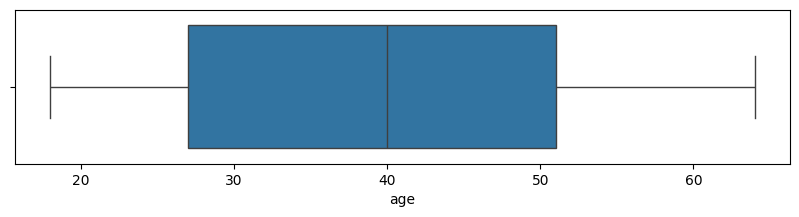

In [11]:
plt.figure(figsize = (10, 2))
sns.boxplot(x = 'age', data = df)

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

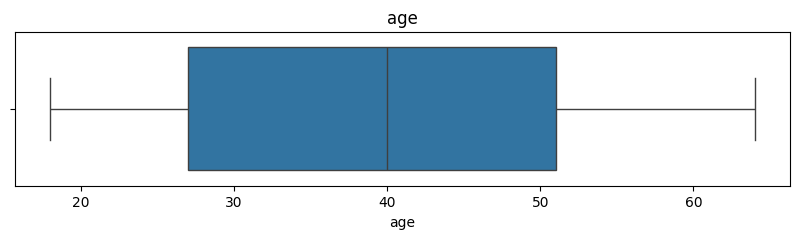

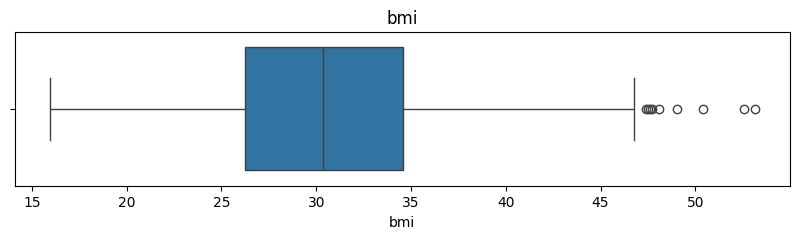

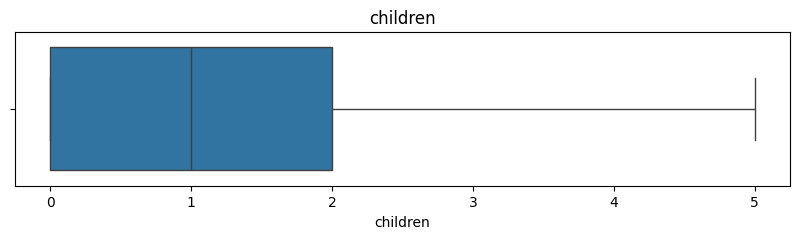

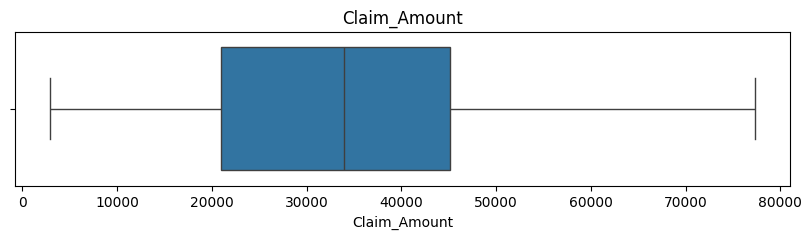

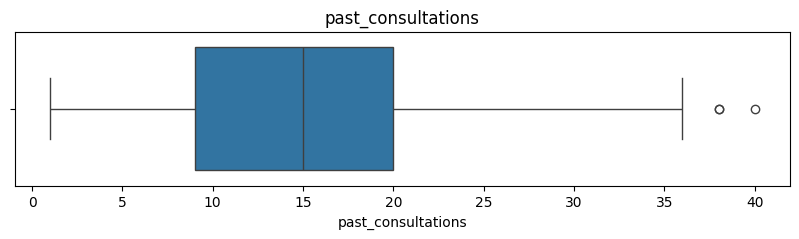

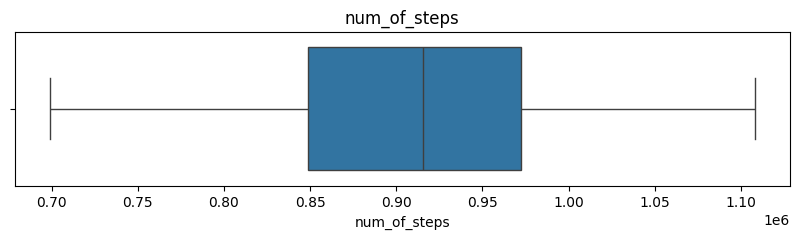

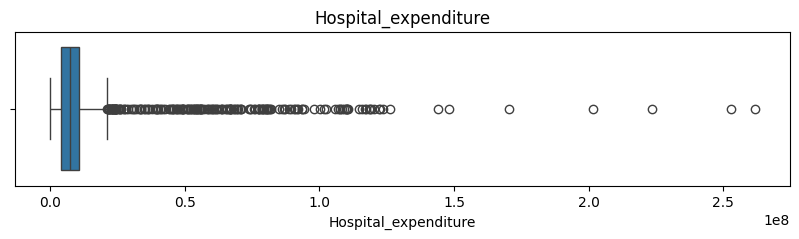

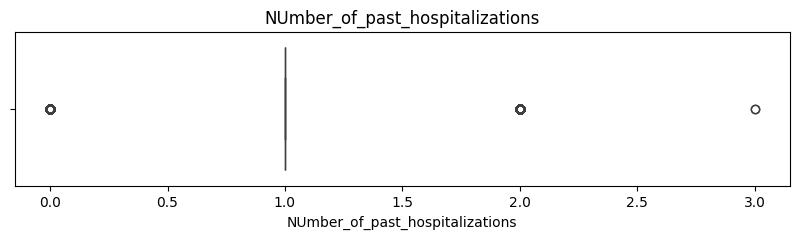

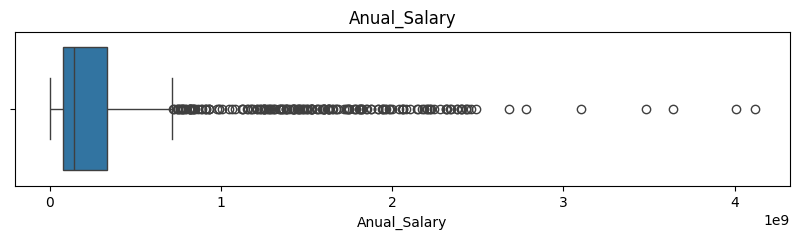

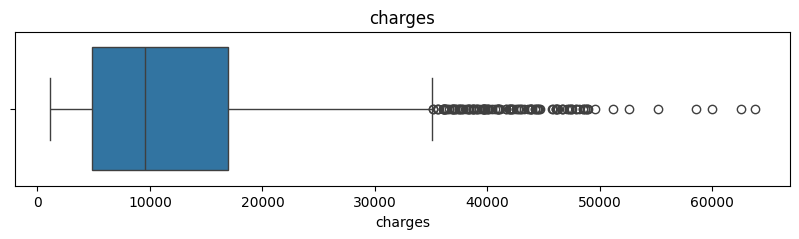

In [13]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure(figsize = (10,2))
    sns.boxplot(x = col, data = df)
    plt.title(col)
    plt.show()

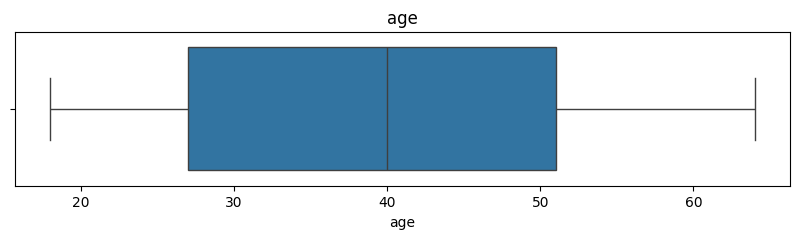

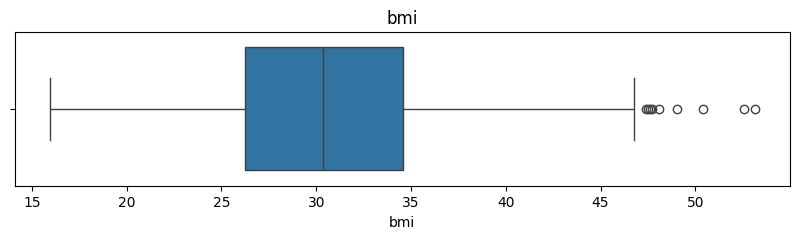

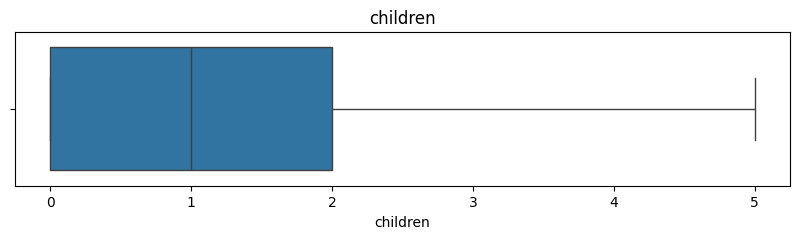

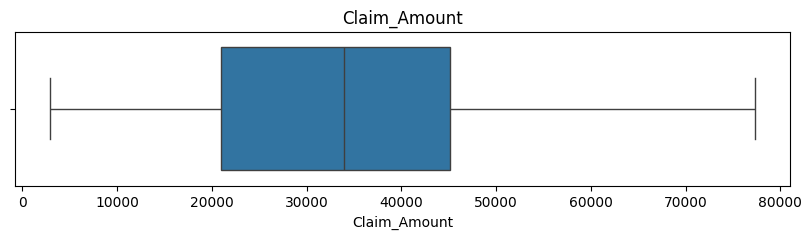

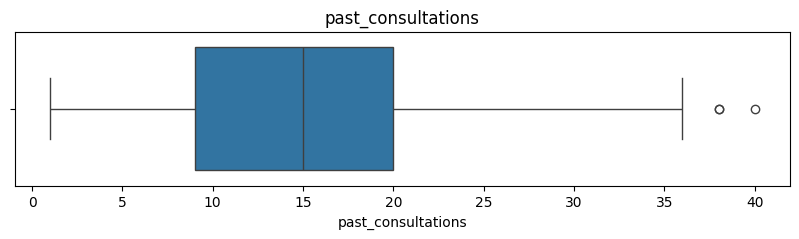

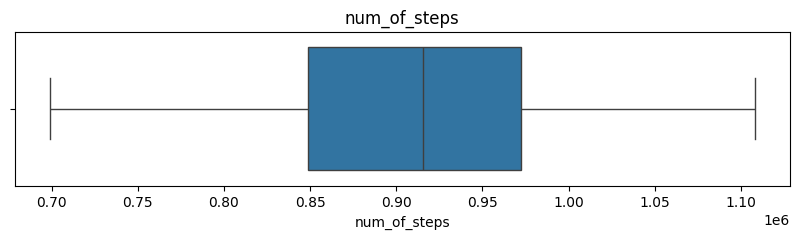

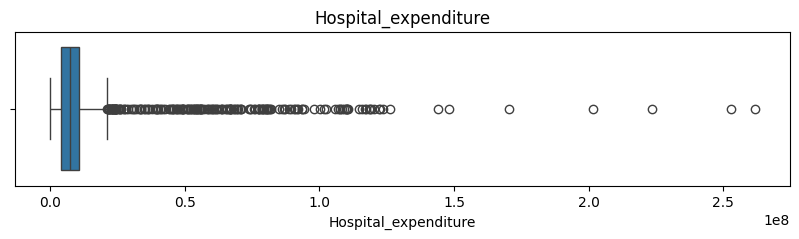

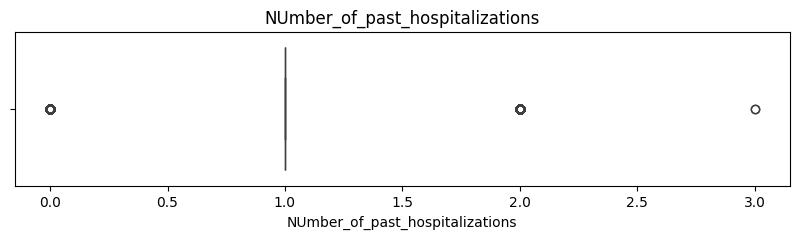

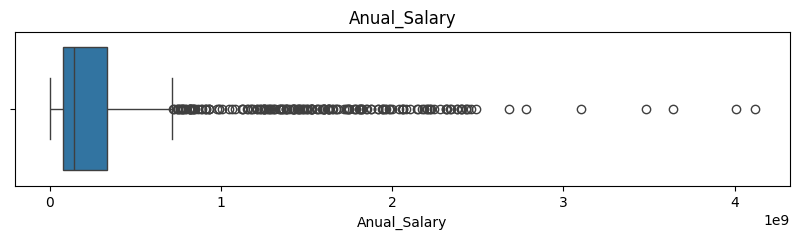

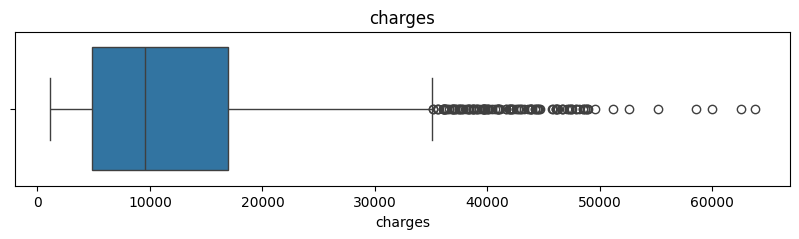

In [14]:
#alternate code using continue
for col in df.columns:
  if df[col].dtype == 'object':
    continue
  plt.figure(figsize = (10,2))
  sns.boxplot(x = col, data = df)
  plt.title(col)
  plt.show()

In [15]:
out_list = ['bmi','past_consultations', 'Hospital_expenditure', 'Anual_Salary', 'charges']

In [16]:
for col in out_list:
  Q3 = df[col].quantile(0.75)
  Q1 = df[col].quantile(0.25)
  IQR = Q3-Q1
  UL = Q3+1.5*IQR
  LL = Q1-1.5*IQR
  df = df[(df[col]>LL) & (df[col]<UL)]

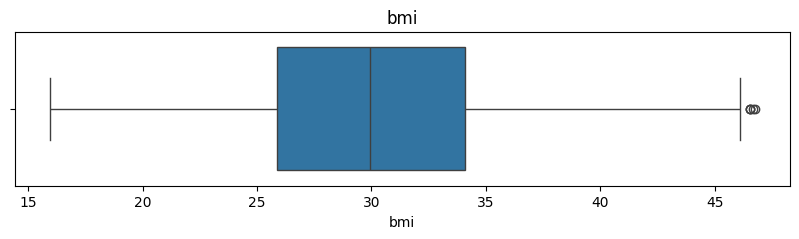

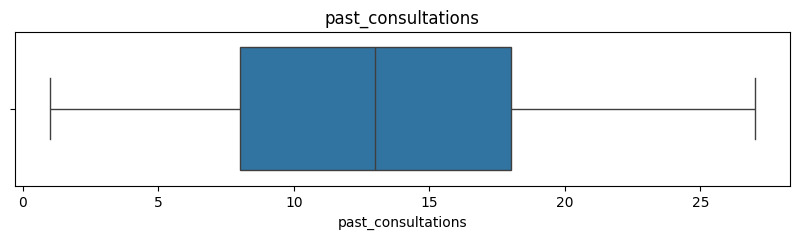

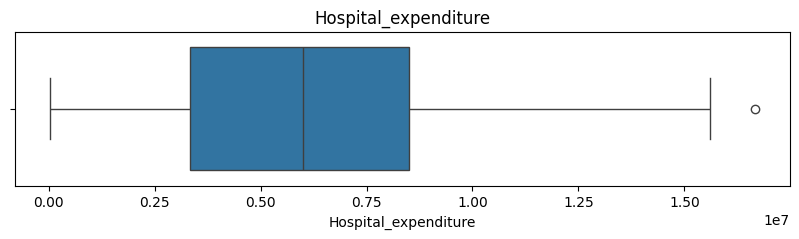

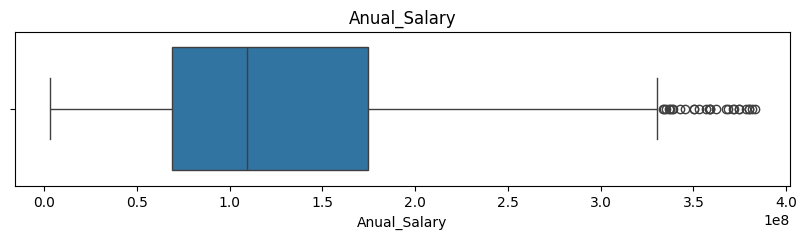

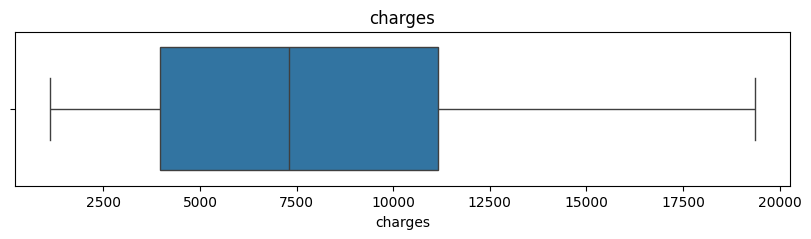

In [17]:
for col in out_list:
  plt.figure(figsize = (10,2))
  sns.boxplot(x = col, data = df)
  plt.title(col)
  plt.show()

In [18]:
df.select_dtypes(include = np.object_).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
L1 = LabelEncoder()
df['sex'] = L1.fit_transform(df['sex'])

In [20]:
df['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
enc = OneHotEncoder()
df['smoker'] = enc.fit_transform(df[['smoker']]).toarray()

In [22]:
enc.categories_

[array(['no', 'yes'], dtype=object)]

In [23]:
df['region'].unique()

array(['southeast', 'southwest', 'northwest', 'northeast'], dtype=object)

In [24]:
ord = OrdinalEncoder()
df['region'] = ord.fit_transform(df[['region']])

In [25]:
ord.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
map = dict(zip(ord.categories_[0], range(len(ord.categories_[0]))))
print(map)

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [27]:
L1.classes_

array(['female', 'male'], dtype=object)

In [28]:
enc.categories_

[array(['no', 'yes'], dtype=object)]

In [29]:
map_enc = dict(zip(enc.categories_[0], range(len(enc.categories_[0]))))
print(map_enc)

{'no': 0, 'yes': 1}


In [30]:
map_L1 = dict(zip(L1.classes_, range(len(L1.classes_))))
print(map_L1)

{'female': 0, 'male': 1}


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 1050
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              986 non-null    float64
 1   sex                              986 non-null    int64  
 2   bmi                              986 non-null    float64
 3   children                         986 non-null    float64
 4   smoker                           986 non-null    float64
 5   Claim_Amount                     986 non-null    float64
 6   past_consultations               986 non-null    float64
 7   num_of_steps                     986 non-null    float64
 8   Hospital_expenditure             986 non-null    float64
 9   NUmber_of_past_hospitalizations  986 non-null    float64
 10  Anual_Salary                     986 non-null    float64
 11  region                           986 non-null    float64
 12  charges                   

In [32]:
df.describe()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02,986.000000,9.860000e+02,986.000000,986.000000
mean,38.827586,0.474645,30.240629,1.072008,0.957404,30370.303537,12.998986,875253.587221,5.979118e+06,0.863083,1.280588e+08,1.514199,7745.503791
std,14.103630,0.499610,5.978399,1.217423,0.202048,14396.127022,5.986872,68165.615785,3.179574e+06,0.343934,8.092098e+07,1.116694,4373.641193
min,18.000000,0.000000,15.960000,0.000000,0.000000,2912.590584,1.000000,699157.000000,2.945253e+04,0.000000,3.150786e+06,0.000000,1121.873900
25%,26.000000,0.000000,25.855000,0.000000,1.000000,18082.195542,8.000000,828138.500000,3.342639e+06,1.000000,6.909543e+07,1.000000,3960.284762
50%,39.000000,0.000000,29.925000,1.000000,1.000000,30760.997275,13.000000,888799.000000,6.002320e+06,1.000000,1.094410e+08,2.000000,7302.620210
75%,51.000000,1.000000,34.100000,2.000000,1.000000,42336.829637,18.000000,931132.000000,8.496163e+06,1.000000,1.745394e+08,3.000000,11164.955237
max,64.000000,1.000000,46.750000,5.000000,1.000000,60712.925340,27.000000,993751.000000,1.665982e+07,1.000000,3.829703e+08,3.000000,19350.368900


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,986.0,3.882759e+01,1.410363e+01,1.800000e+01,2.600000e+01,3.900000e+01,5.100000e+01,6.400000e+01
sex,986.0,4.746450e-01,4.996101e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
bmi,986.0,3.024063e+01,5.978399e+00,1.596000e+01,2.585500e+01,2.992500e+01,3.410000e+01,4.675000e+01
children,986.0,1.072008e+00,1.217423e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
smoker,986.0,9.574037e-01,2.020478e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Claim_Amount,986.0,3.037030e+04,1.439613e+04,2.912591e+03,1.808220e+04,3.076100e+04,4.233683e+04,6.071293e+04
past_consultations,986.0,1.299899e+01,5.986872e+00,1.000000e+00,8.000000e+00,1.300000e+01,1.800000e+01,2.700000e+01
num_of_steps,986.0,8.752536e+05,6.816562e+04,6.991570e+05,8.281385e+05,8.887990e+05,9.311320e+05,9.937510e+05
Hospital_expenditure,986.0,5.979118e+06,3.179574e+06,2.945253e+04,3.342639e+06,6.002320e+06,8.496163e+06,1.665982e+07
NUmber_of_past_hospitalizations,986.0,8.630832e-01,3.439340e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
df.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.003647,0.157363,0.046903,0.205838,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.018011,0.682315
sex,-0.003647,1.000000,0.010777,0.022200,-0.020767,-0.033575,0.001858,-0.058674,-0.004635,-0.082260,-0.025345,-0.017551,-0.039046
bmi,0.157363,0.010777,1.000000,0.012556,0.203690,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.160247,0.019630
children,0.046903,0.022200,0.012556,1.000000,0.028992,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.049654,0.131216
smoker,0.205838,-0.020767,0.203690,0.028992,1.000000,-0.144309,-0.141036,-0.297142,-0.274776,-0.084012,-0.506264,0.016182,-0.435330
Claim_Amount,0.106907,-0.033575,0.013019,0.037777,-0.144309,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.004817,0.194932
past_consultations,0.178307,0.001858,0.017543,0.043747,-0.141036,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.022856,0.286770
num_of_steps,0.763756,-0.058674,0.043881,0.219064,-0.297142,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,-0.044130,0.942969
Hospital_expenditure,0.161881,-0.004635,0.013951,-0.008496,-0.274776,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.019383,0.366163
NUmber_of_past_hospitalizations,0.527364,-0.082260,0.022507,0.309678,-0.084012,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,-0.049122,0.532328


<Axes: >

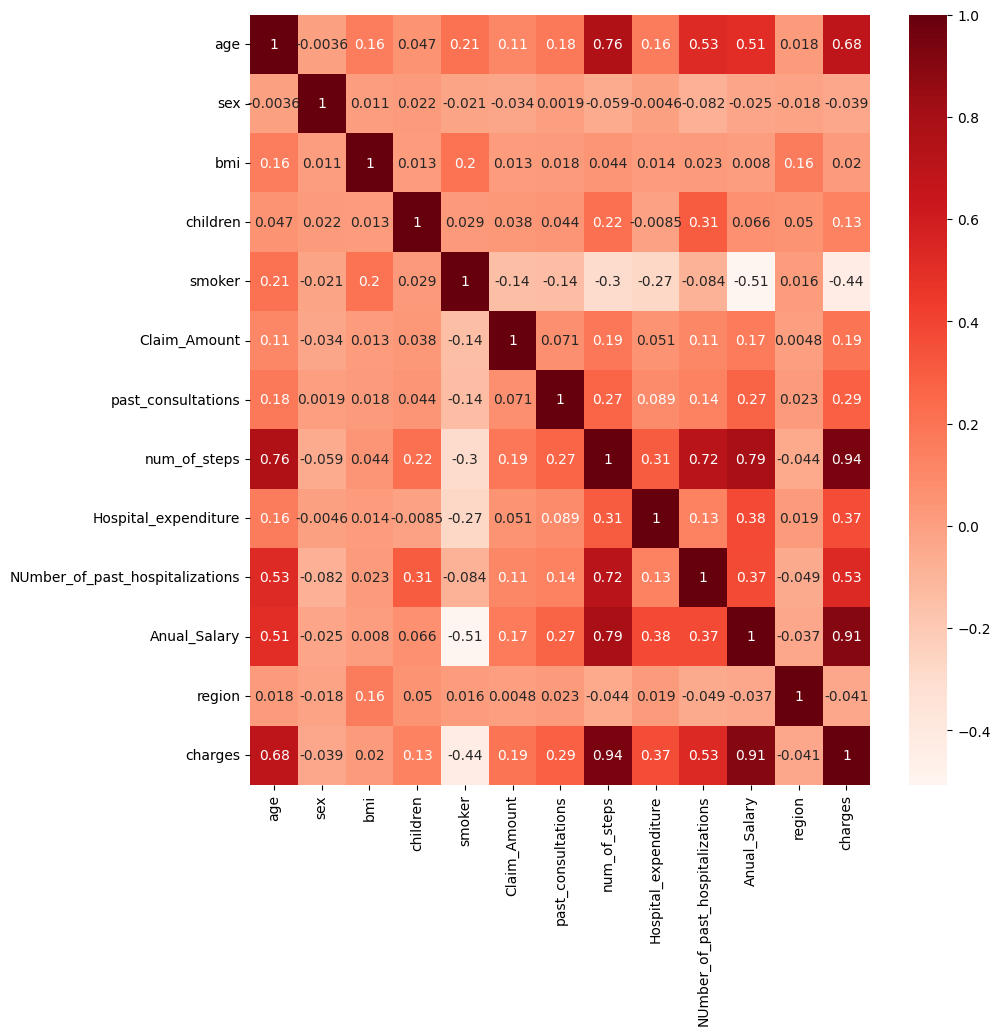

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap (df.corr(), annot = True, cmap = 'Reds')

In [36]:
df.drop('num_of_steps', axis = 1, inplace = True)

<Axes: >

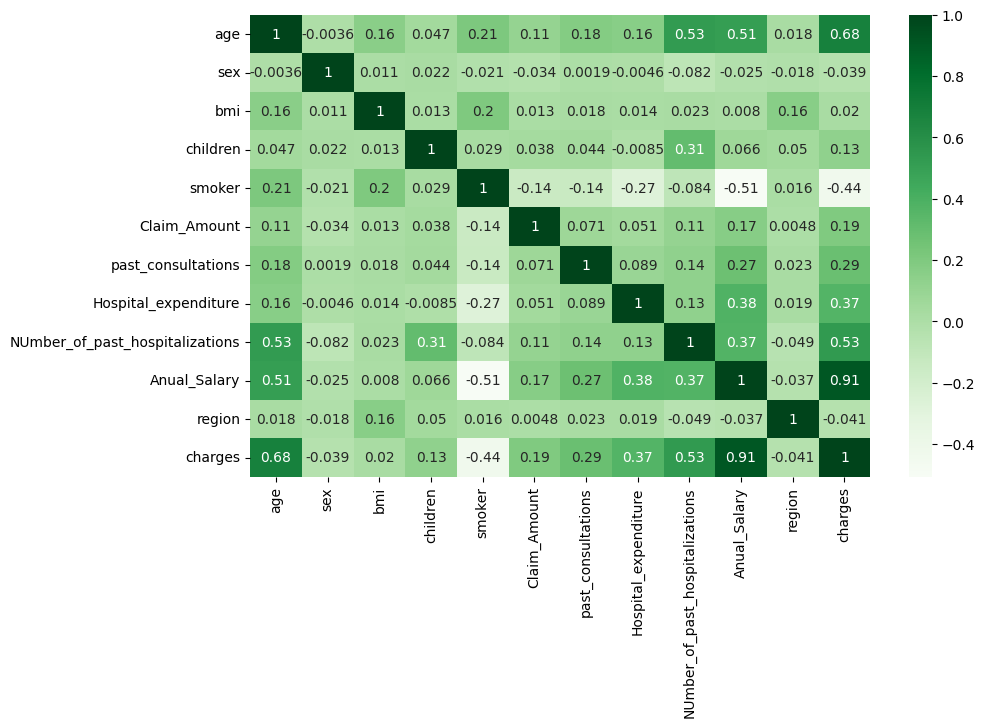

In [37]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

In [38]:
df.drop('Anual_Salary', axis = 1, inplace = True)

<Axes: >

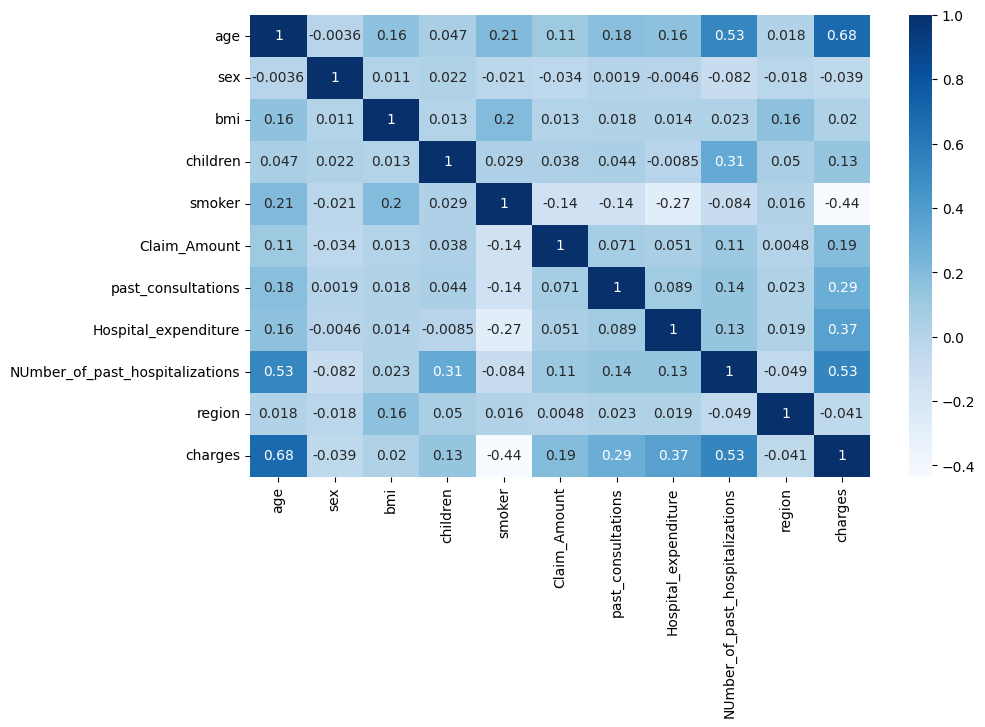

In [39]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [40]:
## Encoding through loop
#for col in df.columns:
 # if df[col].dtype == 'object':
  #  df[col] = L1.fit_transform(df[col]).
##

#Model Building

In [41]:
x = df.drop('charges', axis = 1)

In [42]:
y = df['charges']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 100)

In [45]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,region
121,18.0,0,35.625,0.0,1.0,18623.342090,10.0,3.582244e+04,0.0,0.0
57,18.0,1,30.030,1.0,1.0,43703.251260,20.0,6.195573e+06,0.0,2.0
543,45.0,1,39.805,0.0,1.0,9922.222111,8.0,5.802739e+06,1.0,0.0
861,59.0,0,35.200,0.0,1.0,22753.600730,24.0,1.073512e+07,1.0,2.0
288,30.0,1,44.220,2.0,1.0,30237.338710,15.0,4.117673e+06,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
903,60.0,0,24.035,0.0,1.0,19333.753130,9.0,7.226799e+06,1.0,1.0
919,63.0,1,30.800,0.0,1.0,49853.325820,22.0,9.828749e+06,1.0,3.0
881,57.0,0,25.740,2.0,1.0,29665.917510,22.0,2.673580e+06,1.0,2.0
838,55.0,0,30.140,2.0,1.0,9056.421480,24.0,6.361727e+06,1.0,2.0


In [46]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,region
1030,30.0,1,24.400,3.0,0.0,23306.74970,20.0,1.560269e+07,1.0,3.0
745,56.0,1,34.430,0.0,1.0,50004.29448,19.0,2.012874e+06,1.0,2.0
524,41.0,1,30.590,2.0,1.0,45803.60521,16.0,7.393671e+06,1.0,1.0
769,56.0,1,33.725,0.0,1.0,16543.73014,19.0,1.111280e+07,1.0,1.0
959,64.0,0,35.970,0.0,1.0,28727.00854,6.0,7.871808e+06,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
712,48.0,0,32.300,2.0,1.0,48984.90103,14.0,5.827840e+06,1.0,0.0
880,59.0,0,31.350,0.0,1.0,48296.87730,13.0,2.515130e+06,1.0,1.0
907,61.0,0,44.000,0.0,1.0,14825.98631,12.0,1.066482e+07,1.0,3.0
971,26.0,0,17.195,2.0,0.0,39926.67793,21.0,9.256594e+06,1.0,0.0


In [47]:
y_train

,charges
121,2211.13075
57,1720.35370
543,7448.40395
861,12244.53100
288,4266.16580
...,...
903,13012.20865
919,13390.55900
881,12629.16560
838,11881.96960


In [48]:
y_test

,charges
1030,18259.21600
745,10594.22570
524,7256.72310
769,10976.24575
959,14313.84630
...,...
712,10043.24900
880,12622.17950
907,13063.88300
971,14455.64405


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
Li_model = LinearRegression()

In [51]:
Li_model.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = Li_model.predict(x_test)
y_pred

array([19169.4379723 , 10504.05668839,  8553.99076966, 11770.28433548,
       12741.4673574 ,  6529.65542457,  4727.75121635,  9806.26161565,
        7309.91358086,  2904.51689193,  6898.34436686,  9701.77366837,
        9010.47332514,  4586.69424284,  1508.73855344,  2666.65253273,
       12122.76499479,  5838.76099286,  2385.40812006,  1992.99965508,
        2634.04334375,  8422.82903368,  3774.07900139,  3147.13897067,
       10216.32159214,  7892.89016739, 10796.51521022,  6301.33780167,
        8863.24153828, 21912.29994309,  8098.58172553,  2312.39866438,
        5474.35404659,  4193.31621517, 10155.12106382,  8755.73934176,
       12726.50885764,  9232.13861352, 12269.94622731, 13173.12268661,
        9436.29323082,  7216.17745138,  8665.95197574,  1047.44141587,
        5565.51909997, 14552.85038587, 12924.16518086,  1744.31246338,
        4015.82690578,  4618.53919448, 12204.69052004,  7408.92960688,
        4482.79998494,  9913.94240894,  6916.03101281,  1456.64878744,
      

In [53]:
y_test

,charges
1030,18259.21600
745,10594.22570
524,7256.72310
769,10976.24575
959,14313.84630
...,...
712,10043.24900
880,12622.17950
907,13063.88300
971,14455.64405


In [57]:
#compare result
from sklearn.metrics import r2_score

In [58]:
r2 = r2_score(y_test, y_pred)
r2

0.8616042008389092

In [59]:
Li_model.predict([[18.0,	0,	35.625,	0.0,	1.0,	18623.342090,	10.0,	3.582244e+04,	0.0,	0.0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1333.63757777])

In [60]:
Li_model.predict([[30.0,	1,	24.400,	3.0,	0.0,	23306.74970,	20.0,	1.560269e+07,	1.0,	3.0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19169.43760427])